In [2]:
# random forest is used  for categorical daata
# decision tree, random forest and support vector machine(kernel method) does not effect by outlier  
#even your variable where categirical 
# so in that models we are not suppose to remove outliers in general case
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#to write directory for save the path for using that folder for more file
os.chdir('D:/programming tools/DATA SET')

In [4]:
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
bank.shape

(11162, 17)

In [6]:
bank['marital'].value_counts()# here we can use dommy columns to evaluate

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# to find any outlier from data and remove

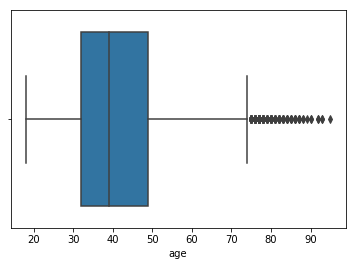

In [8]:
 a=sns.boxplot(x=bank['age'])

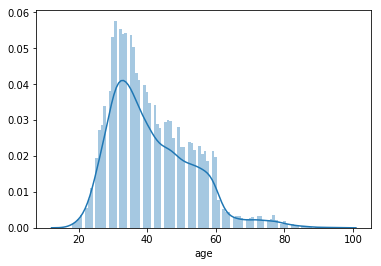

In [9]:
#to show the data distribution
sns.distplot(bank.age,bins=100)

In [10]:
bank["age"].describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [11]:
bank1=bank[bank.age<=49]

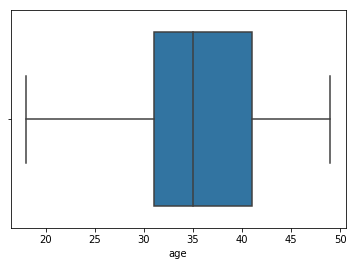

In [12]:
x=sns.boxplot(bank1['age'])

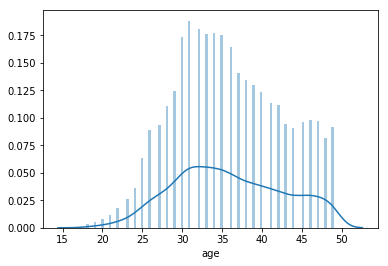

In [13]:
sns.distplot(bank1.age,bins=100)

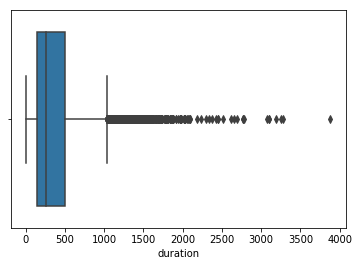

In [14]:
b=sns.boxplot(x=bank['duration'])#exploratory data analysis

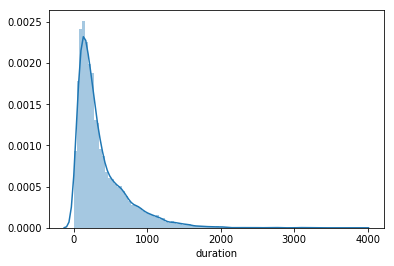

In [15]:
sns.distplot(bank.duration,bins=100)

In [16]:
bank['duration'].describe()

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

In [17]:
bank2=bank1[bank1.duration<=496]

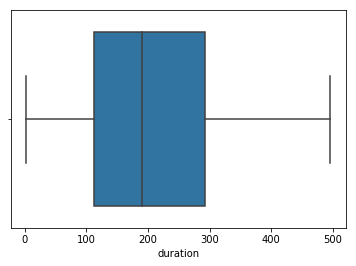

In [18]:
sns.boxplot(bank2['duration'])

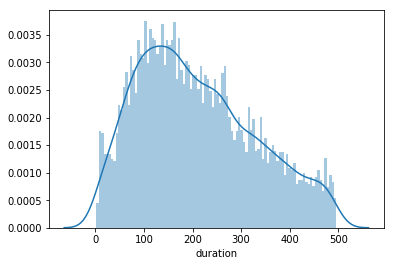

In [19]:
y=sns.distplot(bank2.duration,bins=100)

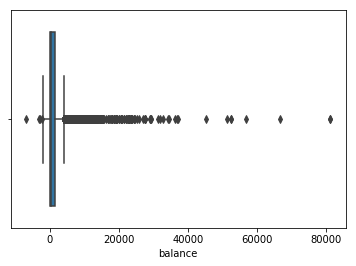

In [20]:
c=sns.boxplot(bank['balance'])

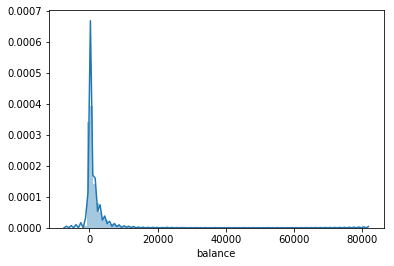

In [21]:
sns.distplot(bank.balance,bins=100)

In [22]:
bank2['balance'].describe()

count     6358.000000
mean      1326.167820
std       2598.775145
min      -6847.000000
25%        105.000000
50%        479.500000
75%       1464.000000
max      56831.000000
Name: balance, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


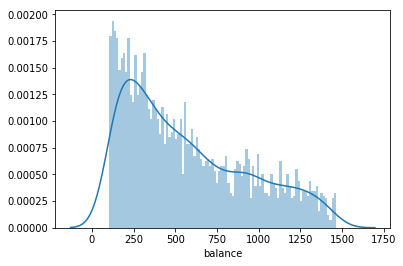

In [23]:
bank3=bank2[(bank2.balance<=1464) & (bank2.balance>=105)]
y=sns.distplot(bank3.balance,bins=100)
print(y)


In [24]:
bank3[:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
20,28,admin.,divorced,secondary,no,785,yes,no,unknown,8,may,442,2,-1,0,unknown,yes
65,44,blue-collar,married,unknown,no,146,yes,no,unknown,15,may,483,1,-1,0,unknown,yes
114,30,blue-collar,single,secondary,yes,239,yes,no,unknown,21,may,412,1,-1,0,unknown,yes
134,30,technician,married,tertiary,no,541,yes,no,unknown,26,may,414,2,-1,0,unknown,yes
142,38,admin.,divorced,secondary,no,198,yes,no,unknown,26,may,431,2,-1,0,unknown,yes


In [25]:
bank3['job'].value_counts()

management       718
blue-collar      584
technician       581
admin.           462
services         311
student          160
self-employed    116
unemployed       104
entrepreneur      82
housemaid         46
unknown           15
retired            6
Name: job, dtype: int64

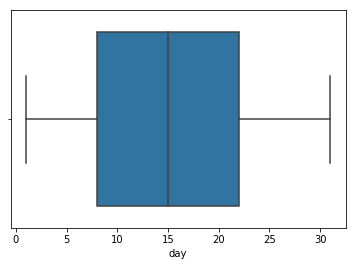

In [26]:
s=sns.boxplot(bank3['day'])

In [27]:
# remove DATE column in any algorithm becouse it not influence data and it is not responsible for variation of data
bank=bank.drop(['day','month','pdays'],axis=1)


In [28]:
bank[:5]

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,673,2,0,unknown,yes


In [29]:
# asssign x variable from data
x=bank.drop(['deposit'],axis=1)

In [30]:
x[:5]

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1042,1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,1467,1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,1389,1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,579,1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,673,2,0,unknown


In [31]:
#drop first is used to delet the previous column in dummies which should notwant with dummies
one_hot_data= pd.get_dummies(bank[['job','marital','education','default','housing','loan','poutcome']],drop_first=True)
one_hot_data[:5]

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [32]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,673,2,0,unknown,yes


In [33]:
x=bank[['age','balance','duration','campaign','previous']]
x=pd.concat([x,one_hot_data],axis=1)
x[:5]

,age,balance,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,56,45,1467,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,41,1270,1389,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,55,2476,579,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,54,184,673,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [34]:
y=bank['deposit']
y[:5]

0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object

In [35]:
print(x.shape)
print(y.shape)

(11162, 27)
(11162,)


In [36]:
from sklearn.model_selection import train_test_split
validation_size=0.3
seed=7 #it is useed for randomisation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7813, 27)
(7813,)
(3349, 27)
(3349,)


# decision tree

In [37]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model=tree.DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
predicted=model.predict(x_test)
predicted

array(['no', 'no', 'yes', ..., 'no', 'no', 'yes'], dtype=object)

In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predicted,y_test))
from sklearn.metrics import accuracy_score
accuracy=round(accuracy_score(predicted,y_test)*100,2)
print('accuracy of this model is',accuracy,'%')

[[1286  421]
 [ 479 1163]]
accuracy of this model is 73.13 %


In [40]:
## joblib library is save the trained model for furthere use 
# when we want to use model in future we  jot need to further train the model because its already trained
from sklearn.externals import joblib
joblib.dump(model, 'bank_csv_classifier.joblib')

['bank_csv_classifier.joblib']

In [42]:
x_train

,age,balance,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown
4760,62,1084,505,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4281,55,0,237,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2217,38,2467,192,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1675,24,2845,779,2,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
8079,39,861,32,5,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2374,52,1524,1007,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11112,37,95,454,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3780,54,752,211,5,4,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
7264,40,49,191,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1710,47,86,387,3,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0


In [46]:
from sklearn import tree
tree.export_graphviz(model, out_file = 'bank_csv_classifier.dot',
                     class_names = sorted(y.unique()),
                     label='all',
                     rounded=True,
                     filled=True)

## random forest

In [41]:
#it is an ensimble model becozz it has many algorithm of decision tree
from sklearn.ensemble import RandomForestClassifier
model_rand=RandomForestClassifier(n_estimators=100) #100 decision tree in one random forest
model_rand.fit(x_train,y_train)
predicted_rand=model_rand.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predicted_rand,y_test))
accuracy_rand=round(accuracy_score(predicted_rand,y_test)*100,2)
accuracy_rand

[[1410  275]
 [ 355 1309]]


81.19

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#k_range=(1,3,5,7,9,11,13,15,18,16,27,25,26,27,30,32,36,39,41,45,48,52,57) #(1,100,2)
k_range=range(1,100,2)
score_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score_list.append(metrics.accuracy_score(y_test,y_pred))
    accuracy_knn=round(accuracy_score(y_pred,y_test)*100,2)
    print('for k=',k,accuracy_knn)

for k= 1 67.87
for k= 3 69.69
for k= 5 71.1
for k= 7 71.96
for k= 9 72.23
for k= 11 72.11
for k= 13 72.65
for k= 15 73.31
for k= 17 73.25
for k= 19 72.83
for k= 21 73.1
for k= 23 72.68
for k= 25 72.74
for k= 27 72.71
for k= 29 72.89
for k= 31 72.83
for k= 33 72.98
for k= 35 73.1
for k= 37 73.22
for k= 39 73.48
for k= 41 73.72
for k= 43 73.69
for k= 45 73.57
for k= 47 73.87
for k= 49 73.75
for k= 51 73.34
for k= 53 72.8
for k= 55 72.86
for k= 57 72.68
for k= 59 72.5
for k= 61 72.71
for k= 63 72.47
for k= 65 72.77
for k= 67 72.59
for k= 69 72.56
for k= 71 72.77
for k= 73 72.83
for k= 75 73.01
for k= 77 72.83
for k= 79 72.74
for k= 81 72.65
for k= 83 72.62
for k= 85 72.59
for k= 87 72.86
for k= 89 72.56
for k= 91 72.77
for k= 93 72.83
for k= 95 72.62
for k= 97 72.59
for k= 99 72.74


In [50]:
k=47
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
score_list.append(metrics.accuracy_score(y_test,y_pred))
accuracy_knn=round(accuracy_score(y_pred,y_test)*100,2)
print('for k=',k,accuracy_knn,'% accuracy')

for k= 47 73.87 % accuracy


In [ ]:
# you not need to divide the the data by train and test, random forest do it by itself
# OOB=out of bag error (miss classification) it show  in confusion matrix
# random forest tested tthe train data by itseelf and showing the output
# after testing data OOB (ie.miss classification)

In [ ]:
# dimensional reduction technique
#1.random forest
#2.Missing Value Ratio and many more